In [1]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt


## Simpson's Rule (Simplified)

We give an intuitive, exam–friendly version in three short parts.

### 1. Quadratic Fitting Idea & Formula
Take an even number of subintervals: $n=2m$, step $h=(b-a)/n$. Group the grid points in triples
$$ x_{2k},\; x_{2k+1}=x_{2k}+h,\; x_{2k+2}=x_{2k}+2h. $$
On each pair of subintervals $[x_{2k}, x_{2k+2}]$ fit the unique quadratic $p_k(x)$ through the three function values. Integrate that quadratic exactly. The result for one pair is
$$ \int_{x_{2k}}^{x_{2k+2}} f(x)\,dx \approx \frac{h}{3}\Big(f(x_{2k}) + 4 f(x_{2k+1}) + f(x_{2k+2})\Big). $$
Adding all $m$ pairs and combining like terms gives the **composite Simpson formula**:
$$ Q_S = \frac{h}{3}\Big[ f(x_0) + 4 f(x_1) + 2 f(x_2) + 4 f(x_3) + 2 f(x_4) + \cdots + 4 f(x_{n-1}) + f(x_n) \Big]. $$

### 2. Why the Coefficients 1, 4, 2, 4, 2, ..., 4, 1?
Look at how often each node belongs to a local quadratic panel:
- Endpoints $x_0, x_n$ appear in only one panel → coefficient $1$.
- Odd indices $x_{2k+1}$ are the middle point of exactly **one** panel → coefficient $4$ (comes directly from the single–panel formula above).
- Even interior nodes $x_{2k}$ (with $0<2k<n$) are the **end** of one panel and the **start** of the next. Each time they contribute a weight $1$; being counted twice yields $1+1=2$.
Hence the repeating pattern: $1, 4, 2, 4, 2, \ldots, 4, 1$.

### 3. Error Order: Why $\boldsymbol{\mathcal O(h^4)}$?
Key facts (no heavy proof needed):
1. The quadratic interpolant integrates any polynomial up to degree $3$ (cubic) exactly. So all terms of $f$ up to third derivative are matched.
2. The first term **not** integrated exactly involves $f^{(4)}$ and contributes a panel error proportional to $h^5$.
3. Summing $m = (b-a)/(2h)$ such panel errors turns $h^5$ into $(b-a) h^4$ overall.
So there exists some $\xi\in(a,b)$ with
$$ E_S = I - Q_S = -\frac{(b-a)}{180} f^{(4)}(\xi) h^4, $$
which implies the global error shrinks like $\mathcal O(h^4)$ (very fast compared to trapezoid $\mathcal O(h^2)$).

Practical takeaway: halving $h$ makes the error drop by roughly $2^4 = 16$ (once you're in the asymptotic regime and $f$ is smooth enough).


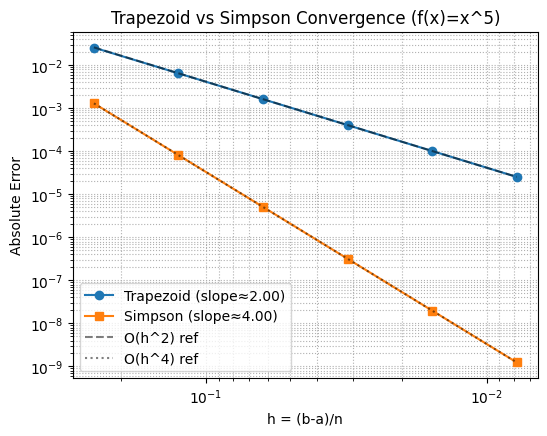

n=   4, h=0.25000, trap_err=2.572e-02, simp_err=1.302e-03
n=   8, h=0.12500, trap_err=6.490e-03, simp_err=8.138e-05
n=  16, h=0.06250, trap_err=1.626e-03, simp_err=5.086e-06
n=  32, h=0.03125, trap_err=4.068e-04, simp_err=3.179e-07
n=  64, h=0.01562, trap_err=1.017e-04, simp_err=1.987e-08
n= 128, h=0.00781, trap_err=2.543e-05, simp_err=1.242e-09
Estimated orders: Trapezoid ~2.00, Simpson ~4.00


In [26]:
# Convergence comparison: Trapezoid (O(h^2)) vs Simpson (O(h^4)) on f(x)=x^5
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**5

a, b = 0.0, 1.0
exact = (b**6 - a**6)/6

def trapezoid(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b-a)/n
    return h*(0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

def simpson(f, a, b, n):
    if n % 2 == 1:
        raise ValueError("n must be even for Simpson's rule")
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b-a)/n
    return (h/3.0) * (y[0] + y[-1] + 4.0*y[1:-1:2].sum() + 2.0*y[2:-2:2].sum())

# Use n values doubling (ensure even)
ns = np.array([4, 8, 16, 32, 64, 128])
hs = (b - a)/ns
err_trap = []
err_simp = []
for n in ns:
    err_trap.append(abs(exact - trapezoid(f, a, b, int(n))))
    err_simp.append(abs(exact - simpson(f, a, b, int(n))))
err_trap = np.array(err_trap)
err_simp = np.array(err_simp)

# Fit slopes (log-log)
sl_trap = np.polyfit(np.log(hs), np.log(err_trap), 1)[0]
sl_simp = np.polyfit(np.log(hs), np.log(err_simp), 1)[0]

plt.figure(figsize=(6,4.5))
plt.loglog(hs, err_trap, 'o-', label=f'Trapezoid (slope≈{sl_trap:.2f})')
plt.loglog(hs, err_simp, 's-', label=f"Simpson (slope≈{sl_simp:.2f})")
# Reference lines anchored at last Simpson error
C2 = err_trap[-1]/hs[-1]**2
C4 = err_simp[-1]/hs[-1]**4
plt.loglog(hs, C2*hs**2, 'k--', alpha=0.5, label='O(h^2) ref')
plt.loglog(hs, C4*hs**4, 'k:', alpha=0.5, label='O(h^4) ref')
plt.gca().invert_xaxis()
plt.xlabel('h = (b-a)/n')
plt.ylabel('Absolute Error')
plt.title('Trapezoid vs Simpson Convergence (f(x)=x^5)')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.show()

for n,h,e2,e4 in zip(ns, hs, err_trap, err_simp):
    print(f'n={n:4d}, h={h:.5f}, trap_err={e2:.3e}, simp_err={e4:.3e}')
print(f'Estimated orders: Trapezoid ~{abs(sl_trap):.2f}, Simpson ~{abs(sl_simp):.2f}')

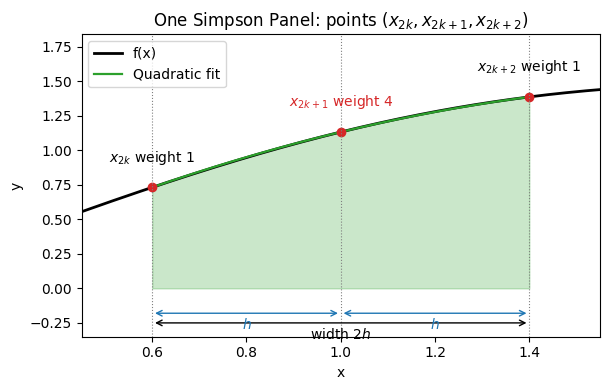

Single panel Simpson ≈ 0.88607790, high-res integral ≈ 0.88585998, error ≈ 2.18e-04


In [1]:
# Single Simpson panel illustration
import numpy as np
import matplotlib.pyplot as plt

# Example smooth function
def f(x):
    return np.sin(1.2*x) + 0.2*x**2

# Choose a panel starting point and step
x0 = 0.6
h  = 0.4
x1 = x0 + h
x2 = x0 + 2*h

# Sample values
f0, f1, f2 = f(x0), f(x1), f(x2)

# Build quadratic interpolant via Lagrange form
xd = np.linspace(x0, x2, 300)
L0 = (xd - x1)*(xd - x2)/((x0 - x1)*(x0 - x2))
L1 = (xd - x0)*(xd - x2)/((x1 - x0)*(x1 - x2))
L2 = (xd - x0)*(xd - x1)/((x2 - x0)*(x2 - x1))
pd = f0*L0 + f1*L1 + f2*L2

# True curve for context
x_full = np.linspace(x0 - 0.15, x2 + 0.15, 400)

fig, ax = plt.subplots(figsize=(6.2, 4))
ax.plot(x_full, f(x_full), 'k', lw=2, label='f(x)')
ax.plot(xd, pd, color='C2', lw=1.6, label='Quadratic fit')
ax.fill_between(xd, 0, pd, color='C2', alpha=0.25)

# Plot the three nodes
ax.plot([x0, x1, x2], [f0, f1, f2], 'o', color='C3', ms=6)

# Vertical guides
for xx in [x0, x1, x2]:
    ax.axvline(xx, color='gray', lw=0.8, ls=':')

# Annotate nodes and weights (local panel 1,4,1)
ax.text(x0, f0+0.15, r'$x_{2k}$ weight 1', ha='center', va='bottom')
ax.text(x1, f1+0.15, r'$x_{2k+1}$ weight 4', ha='center', va='bottom', color='C3')
ax.text(x2, f2+0.15, r'$x_{2k+2}$ weight 1', ha='center', va='bottom')

# Decorative arrow for width 2h
ax.annotate('', xy=(x0, -0.25), xytext=(x2, -0.25), arrowprops=dict(arrowstyle='<->'))
ax.text((x0+x2)/2, -0.28, r'width $2h$', ha='center', va='top')
ax.annotate('', xy=(x0, -0.18), xytext=(x1, -0.18), arrowprops=dict(arrowstyle='<->', color='C0'))
ax.annotate('', xy=(x1, -0.18), xytext=(x2, -0.18), arrowprops=dict(arrowstyle='<->', color='C0'))
ax.text((x0+x1)/2, -0.21, r'$h$', ha='center', va='top', color='C0')
ax.text((x1+x2)/2, -0.21, r'$h$', ha='center', va='top', color='C0')

ax.set_xlim(x0-0.15, x2+0.15)
ax.set_ylim(min(0, f(x_full).min()) - 0.35, f(x_full).max() + 0.4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("One Simpson Panel: points $(x_{2k}, x_{2k+1}, x_{2k+2})$")
ax.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Print panel approximation vs true integral on this small region
panel_exact = np.trapezoid(f(xd), xd)  # high-res proxy
panel_simpson = (h/3)*(f0 + 4*f1 + f2)
print(f'Single panel Simpson ≈ {panel_simpson:.8f}, high-res integral ≈ {panel_exact:.8f}, error ≈ {panel_simpson - panel_exact:.2e}')

### Visualizing One Simpson Panel (Grouping)
We group points in triples:
$$ x_{2k},\; x_{2k+1}=x_{2k}+h,\; x_{2k+2}=x_{2k}+2h. $$
On just this pair of subintervals $[x_{2k}, x_{2k+2}]$ we replace $f$ by the unique parabola through the three samples:
$$ (x_{2k}, f_{2k}),\; (x_{2k+1}, f_{2k+1}),\; (x_{2k+2}, f_{2k+2}). $$
Integrating that parabola over the entire width $2h$ gives the weight pattern $1,4,1$ for this panel:
$$ \int_{x_{2k}}^{x_{2k+2}} f(x)\,dx \approx \frac{h}{3}\big(f_{2k} + 4 f_{2k+1} + f_{2k+2}\big). $$
When panels touch, interior even nodes like $x_{2k+2}$ become the left endpoint of the next panel, so their coefficient adds: $1+1=2$. That is how the global sequence $1,4,2,4,2,\ldots,4,1$ forms.
Below: a picture of one panel showing the parabola and the three sample points.

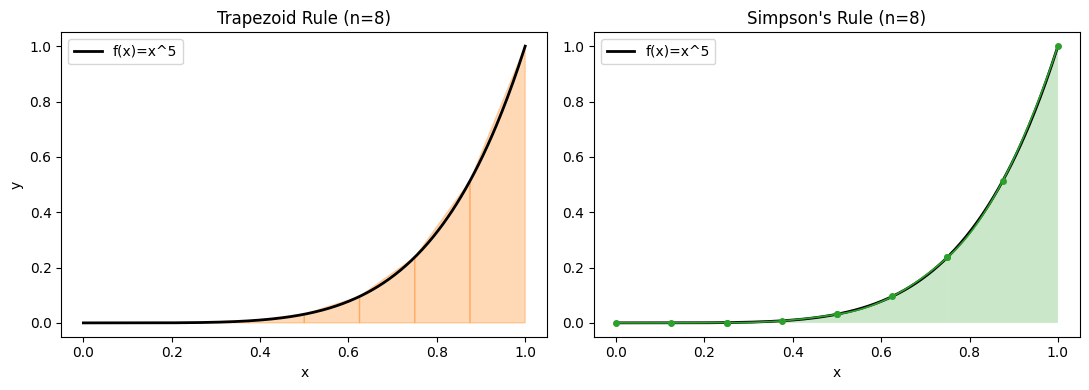

Exact     = 0.1666666667
Trapezoid = 0.1731567383  error = 6.490e-03
Simpson   = 0.1667480469  error = 8.138e-05


In [25]:
# Simpson vs Trapezoid: Visualization on f(x)=x^5 over [0,1]
import numpy as np
import matplotlib.pyplot as plt

# Define function and exact integral
def f(x):
    return x**5

a, b = 0.0, 1.0
exact = (b**6 - a**6)/6  # integral of x^5 = x^6/6

# Composite trapezoid
def trapezoid(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b-a)/n
    return h*(0.5*y[0] + y[1:-1].sum() + 0.5*y[-1])

# Composite Simpson (n must be even)
def simpson(f, a, b, n):
    if n % 2 == 1:
        raise ValueError("n must be even for Simpson's rule")
    x = np.linspace(a, b, n+1)
    y = f(x)
    h = (b-a)/n
    return (h/3.0) * (y[0] + y[-1] + 4.0*y[1:-1:2].sum() + 2.0*y[2:-2:2].sum())

# Helper to draw Simpson panels (parabolas through each pair of subintervals)
from numpy.polynomial import Polynomial as Poly

def plot_simpson_panels(ax, f, a, b, n):
    x_nodes = np.linspace(a, b, n+1)
    h = (b-a)/n
    for i in range(0, n, 2):
        x0, x1, x2 = x_nodes[i], x_nodes[i+1], x_nodes[i+2]
        y0, y1, y2 = f(x0), f(x1), f(x2)
        # Fit quadratic p(t) = at^2+bt+c in local coordinates t = x - x0
        # Solve via interpolation matrix
        T = np.array([[0.0**2, 0.0, 0.0, 1.0],
                      [(x1-x0)**2, (x1-x0), (x1-x0)**0, 1.0],
                      [(x2-x0)**2, (x2-x0), (x2-x0)**0, 1.0]])
        # Actually simpler: use Lagrange sampling directly discretely for plotting
        xs_dense = np.linspace(x0, x2, 80)
        # Lagrange basis
        L0 = (xs_dense - x1)*(xs_dense - x2)/((x0 - x1)*(x0 - x2))
        L1 = (xs_dense - x0)*(xs_dense - x2)/((x1 - x0)*(x1 - x2))
        L2 = (xs_dense - x0)*(xs_dense - x1)/((x2 - x0)*(x2 - x1))
        p_dense = y0*L0 + y1*L1 + y2*L2
        ax.fill_between(xs_dense, 0, p_dense, color='C2', alpha=0.25, edgecolor='none')
        ax.plot(xs_dense, p_dense, color='C2', lw=1.2)
        ax.plot([x0, x1, x2], [y0, y1, y2], 'o', color='C2', ms=4)

# Choose an even n for Simpson
even_n = 8
trap_n = even_n  # compare on same partition

x_dense = np.linspace(a, b, 400)
fig, axes = plt.subplots(1, 2, figsize=(11, 4))

# Trapezoid visualization
axes[0].plot(x_dense, f(x_dense), 'k', lw=2, label='f(x)=x^5')
x_trap = np.linspace(a, b, trap_n+1)
y_trap = f(x_trap)
for i in range(trap_n):
    xs = [x_trap[i], x_trap[i], x_trap[i+1], x_trap[i+1]]
    ys = [0, y_trap[i], y_trap[i+1], 0]
    axes[0].fill(xs, ys, color='C1', alpha=0.30)
axes[0].set_title(f'Trapezoid Rule (n={trap_n})')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()

# Simpson visualization
axes[1].plot(x_dense, f(x_dense), 'k', lw=2, label='f(x)=x^5')
plot_simpson_panels(axes[1], f, a, b, even_n)
axes[1].set_title(f"Simpson's Rule (n={even_n})")
axes[1].set_xlabel('x')
axes[1].legend()

plt.tight_layout()
plt.show()

trap_val = trapezoid(f, a, b, trap_n)
simp_val = simpson(f, a, b, even_n)
print(f'Exact     = {exact:.10f}')
print(f'Trapezoid = {trap_val:.10f}  error = {abs(exact-trap_val):.3e}')
print(f"Simpson   = {simp_val:.10f}  error = {abs(exact-simp_val):.3e}")